# Basic Python Tutorial for Fourier Series

In addition to learning Analog Signal Processing this semester, you will also gain exposure to and practice using Python to solve problems that are tedious to do by hand, as well as to create visualizations of signals in frequency and the effect of processing them.

The following notebook will introduce computational tools for Fourier series representations of periodic signals.
It will use the trigonometric Fourier series:
$f(t) = \frac{a_0}{2} +\ \sum_{n=1}^{\infty}\left( a_n\cos\left(n\omega_0t\right)\ +\ b_n\sin\left(n\omega_0t\right)\right),$ 

where the coefficients are obtained from:

$a_n\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos\left(n\omega_0t\right)dt$

$b_n\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\sin\left(n\omega_0t\right)dt$

Import necessary libraries:
- numpy, will be used to handle arrays, more info: https://numpy.org/doc/stable/index.html
- matplotlib.pyplot, will be used for plotting, more info: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
- scipy.integrate, will be used to integrate, more info: https://docs.scipy.org/doc/scipy/tutorial/integrate.html


In [259]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Define below:
- the period of the function, $T,$
- the function to be represented using Fourier series, $f(t)\ =\  e^{t},\ t\in[0,T),$
with period $T=1.75.$
- the basis functions for the Fourier series

NOTE: feel free to change the function and/or T to anything you want so you can get a better understanding of Fourier series representation.  This notebook will assume that the function expression below is defined on [0,T], if it is defined over some other interval, you must adjust the code accordingly.

**NOTE**: there will be multiple cells in this notebook that start with the line "#grade (DO NOT DELETE THIS LINE)".  Do NOT delete that line or the autograder will not be able to grade your submission.


In [274]:
#grade (DO NOT DELETE THIS LINE) 

T = 2   #period of the function

# Function we want to integrate. Accepts two parameters, the period, T, and the values to evaluate, t.
# Feel free to change the function to anything you want so you can get a better understanding of Fourier series representation. 
# However, to submit your HW, you must use the function provided: np.exp(t%T)
# This notebook will assume that the function expression below is defined on [0,T], if it is defined over some other interval, you must adjust the code accordingly.
def f(t,T):
    #return np.exp(t%T)  # the '%' is used as modulus, so the function becomes periodic.
    return (3 + (t%T) - ((t%T)**2))

# if using trigonomoetric form, need sines and cosines
def trig1(k,T,t):   # 'k' is the harmonic number, 'T' is the period, and 't' is time
    return np.cos(2*np.pi/T*k*t)
def trig2(k,T,t):   # 'k' is the harmonic number, 'T' is the period, and 't' is time
    return np.sin(2*np.pi/T*k*t)

Set up number of points to plot and the corresponding time interval for plotting: [-T,T].

The 'linspace(start, stop, num)' function returns 'num' evenly spaced samples, calculated over the interval [start, stop]. More info on it can be found here: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [275]:
#grade (DO NOT DELETE THIS LINE) 

num_points2plot = 1000   #number of points to plot
t = np.linspace(-T, T, num_points2plot) #time interval to plot
n_min = 0   #will keep track of number of terms in the series used

Calculate DC first using

$a_0\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)dt$

You can integrate numerically in Python using the 'quad()' function, which we imported already from scipy.integrate.
- The first argument is the function to be integrated, which we already defined as ' $f$ '.
- The second argument is the lower limit of integration, which in this case is $-\frac{T}{2}$.
- The third argument is the upper limit of integration, which in this case is $\frac{T}{2}$.

More info on pyton integration: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

In [276]:
#grade (DO NOT DELETE THIS LINE) 

# Calculate DC first
integrand = lambda x: (2/T)*f(x,T)  #create temporary function 'integrand' with parameter 'x' so we can multiply f by (2/T) to integrate
a0, err =  quad(integrand, 0, T)   #integrate f from -T/2 to T/2
f_approx = (a0/2)*np.ones(num_points2plot)   # Create DC component of Fourier series with 'num_points2plot' identical terms.

Plot the original function and the approximation so far (only DC so far).

More info on plotting in python: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

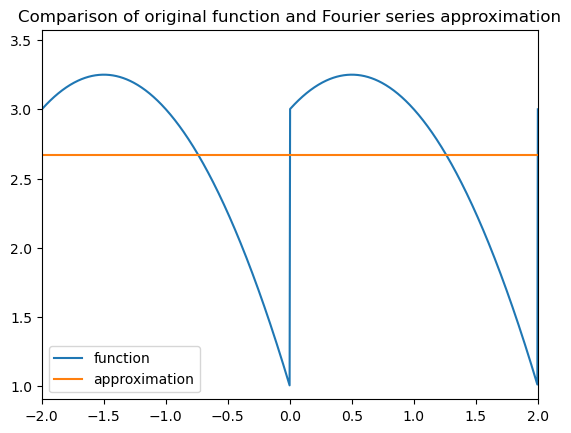

In [277]:
plt.plot(t, f(t,T), label='function')   #plot 't' in x-axis, f in y-axis, and label that curve
plt.plot(t, f_approx, label='approximation')   #plot 't' in x-axis, Foutier series (f_approx) in y-axis, and label that curve
plt.xlim([-T, T])   # set the x-axis limits
plt.ylim([min(f(t,T))-0.1*min(f(t,T)),max(f(t,T))+0.1*max(f(t,T))])  # set the y-axis limits and give some additional span for approximation
plt.legend()   #add the legend with the labels set above
plt.title('Comparison of original function and Fourier series approximation')  #add title to figure
plt.show()   #show figure

Remember that the rest of the terms in the Fourier series are time-varying sines and cosines, which will be 'mounted' around the DC level.
$f(t) = \frac{a_0}{2} +\ \sum_{n=1}^{\infty}\left( a_n\cos\left(n\omega_0t\right)\ +\ b_n\sin\left(n\omega_0t\right)\right),$ 

We will calculate the rest of the coefficients and plot the approximation and the original function, so you can see the effect of each additional term.

Recall that 

$a_n\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos\left(n\omega_0t\right)dt\ \ \ \ \text{and}\ \ \ \ \ 
b_n\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\sin\left(n\omega_0t\right)dt$

In [278]:
#grade (DO NOT DELETE THIS LINE) 

num_coeff = 50   #number of coefficients to use
a_n = np.zeros(num_coeff+1)   #array to hold the a_n coefficients
a_n[0] = a0  #we already calculated the DC (0-th coefficient)
b_n = np.zeros(num_coeff+1)   #array to hold the b_n coefficients

Start with the $n=1$ term:

$a_1\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos\left(\omega_0t\right)dt\ \ \ \ \text{and}\ \ \ \ \ 
b_1\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\sin\left(\omega_0t\right)dt$

And compare $f(t)$ to

$f_{approx}(t) = \frac{a_0}{2} +\ a_1\cos\left(\omega_0t\right)\ +\ b_1\sin\left(\omega_0t\right)$


<Figure size 640x480 with 0 Axes>

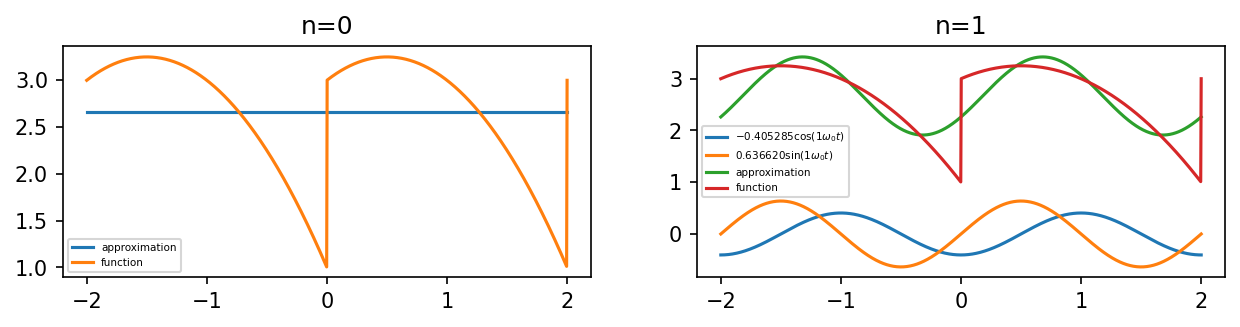

In [279]:
#grade (DO NOT DELETE THIS LINE) 

# integrate (2/T)*f(x)*cos(w0x) from -T/2 to T/2. 
integrand = lambda x: (2/T)*f(x,T)*trig1(1,T,x)   #create temporay function 'integrand' so we can multiply functions to integrate
a_n[1], err = quad(integrand, 0, T)   #obtain the a_1 coefficient

# integrate (2/T)*f(x)*sin(w0x) from -T/2 to T/2. 
integrand = lambda x: (2/T)*f(x,T)*trig2(1,T,x)   #create temporay function 'integrand' so we can multiply functions to integrate
b_n[1], err = quad(integrand, 0, T)   #obtain the b_1 coefficient

#add new terms to Fourier series
f_approx += a_n[1]*trig1(1,T,t) + b_n[1]*trig2(1,T,t)
n_min += 1

plt.figure()   #create new figure
plt.figure(figsize=(10, 2), dpi= 150) # define the size of the figure (optional)

#plot the DC only term and then later separately the new n=1 terms for comparison
plt.subplot(1,2,1)   # create subplot with 1 row and 2 columns, and plot on first column
plt.plot(t, (a0/2)*np.ones(num_points2plot), label='approximation')
plt.plot(t, f(t,T), label='function')
plt.legend(prop={'size': 5})
plt.title('n=%i' %(0))

# now plot the new n=1 terms for comparison
plt.subplot(1,2,2)   # create subplot with 1 row and 2 columns, and plot on the 2nd column 
plt.plot(t, a_n[1]*trig1(1,T,t), label='$%f\cos(%i\omega_0 t)$' %(a_n[1],1))
plt.plot(t, b_n[1]*trig2(1,T,t), label='$%f\sin(%i\omega_0 t)$' %(b_n[1],1))
plt.plot(t, f_approx, label='approximation')
plt.plot(t, f(t,T), label='function')
plt.legend(prop={'size': 5})
plt.title('n=%i' %(1))

plt.show()

In the plots above, notice the contribution of the $n=1$ terms to the approximation.

On the plot on the right, the $a_1\cos\left(\omega_0t\right)$ and $b_1\sin\left(\omega_0t\right)$ are plotted individually so you can visualize how they are 'mounted' on the DC line that we already had (plot on the left), in order to get the approximation up to $n=1$.

$f_{approx}(t) = \frac{a_0}{2} +\ a_1\cos\left(\omega_0t\right)\ +\ b_1\sin\left(\omega_0t\right)$

Let's now look at the contribution from the $n=2$ term:

$a_2\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos\left(2\omega_0t\right)dt\ \ \ \ \text{and}\ \ \ \ \ 
b_2\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\sin\left(2\omega_0t\right)dt$

And compare $f(t)$ to

$f_{approx}(t) = \frac{a_0}{2} +\ a_1\cos\left(\omega_0t\right)\ +\ b_1\sin\left(\omega_0t\right)\ +\ a_2\cos\left(2\omega_0t\right)\ +\ b_2\sin\left(2\omega_0t\right)$


<Figure size 640x480 with 0 Axes>

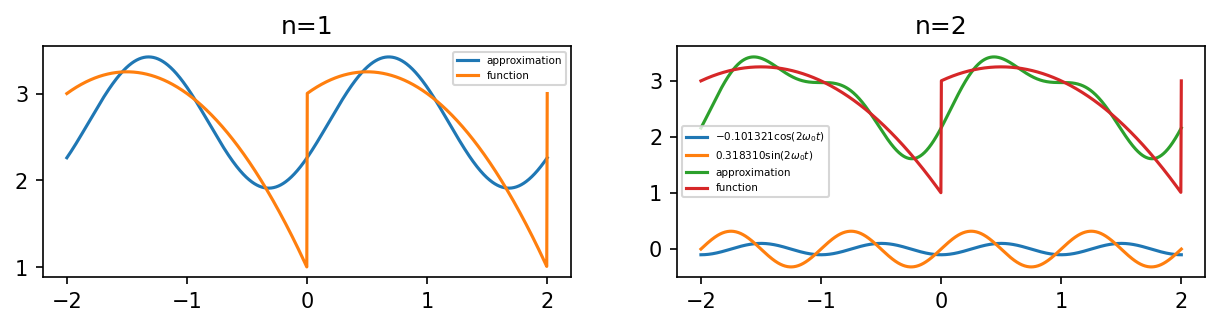

In [280]:
#grade (DO NOT DELETE THIS LINE) 

# integrate (2/T)*f(x)*cos(2w0x) from -T/2 to T/2. 
integrand = lambda x: (2/T)*f(x,T)*trig1(2,T,x)   #create temporay function 'integrand' so we can multiply functions to integrate
a_n[2], err = quad(integrand, 0, T)   #obtain the a_2 coefficient

# integrate (2/T)*f(x)*sin(2w0x) from -T/2 to T/2. 
integrand = lambda x: (2/T)*f(x,T)*trig2(2,T,x)   #create temporay function 'integrand' so we can multiply functions to integrate
b_n[2], err = quad(integrand, 0, T)   #obtain the b_2 coefficient

#copy the previous approximation so we can plot it
f_temp = f_approx.copy()   # cannot use just f_temp = f_approx because it would create a reference copy, so any changes would affect both 'copies']'

#add new terms to Fourier series
f_approx += a_n[2]*trig1(2,T,t) + b_n[2]*trig2(2,T,t)
n_min += 1

plt.figure()   #create new figure
plt.figure(figsize=(10, 2), dpi= 150) # define the size of the figure (optional)

#plot the previous approximation and then later separately the new n=2 terms for comparison
plt.subplot(1,2,1)   # create subplot with 1 row and 2 columns, and plot on first column
plt.plot(t, f_temp, label='approximation')
plt.plot(t, f(t,T), label='function')
plt.legend(prop={'size': 5})
plt.title('n=%i' %(1))

# now plot the new n=2 terms for comparison
plt.subplot(1,2,2)   # create subplot with 1 row and 2 columns, and plot on the 2nd column 
plt.plot(t, a_n[2]*trig1(2,T,t), label='$%f\cos(%i\omega_0 t)$' %(a_n[2],2))
plt.plot(t, b_n[2]*trig2(2,T,t), label='$%f\sin(%i\omega_0 t)$' %(b_n[2],2))
plt.plot(t, f_approx, label='approximation')
plt.plot(t, f(t,T), label='function')
plt.legend(prop={'size': 5})
plt.title('n=%i' %(2))

plt.show()

In the plots above, notice the contribution of the $n=2$ terms to the approximation.

On the plot on the right, the $a_2\cos\left(2\omega_0t\right)$ and $b_2\sin\left(2\omega_0t\right)$ are plotted individually so you can visualize how they are 'mounted' on the approximation that we already had up to $n=1$ (plot on the left) in order to approximate now up to $n=2$.

$f_{approx}(t) = \frac{a_0}{2} +\ a_1\cos\left(\omega_0t\right)\ +\ b_1\sin\left(\omega_0t\right)\ +\ a_2\cos\left(2\omega_0t\right)\ +\ b_2\sin\left(2\omega_0t\right)$


We will now calculate the rest of the coefficients and plot the approximation and the original function, so you can see the effect of each additional term.

Recall that 

$f(t) = \frac{a_0}{2} +\ \sum_{n=1}^{\infty}\left( a_n\cos\left(n\omega_0t\right)\ +\ b_n\sin\left(n\omega_0t\right)\right),$ 

$a_n\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos\left(n\omega_0t\right)dt\ \ \ \ \text{and}\ \ \ \ \ 
b_n\ =\ \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\sin\left(n\omega_0t\right)dt$

<Figure size 640x480 with 0 Axes>

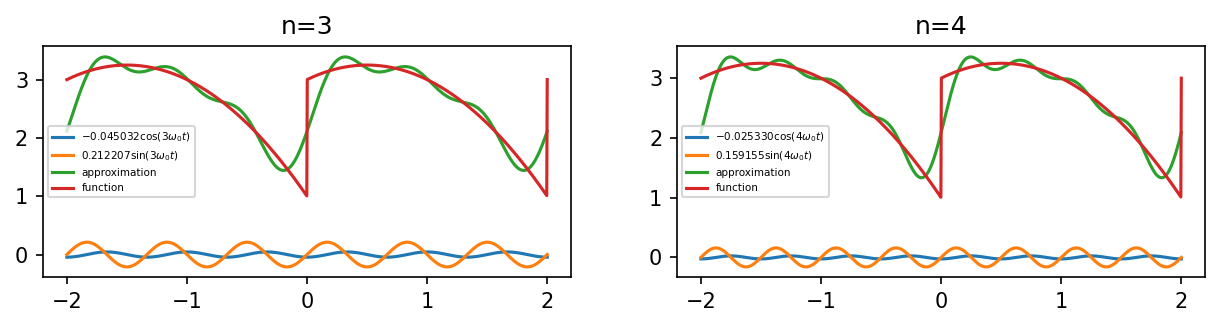

<Figure size 640x480 with 0 Axes>

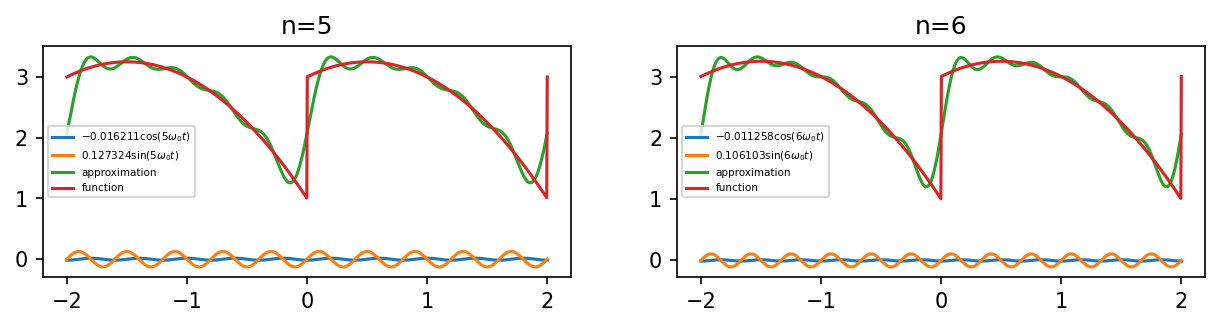

<Figure size 640x480 with 0 Axes>

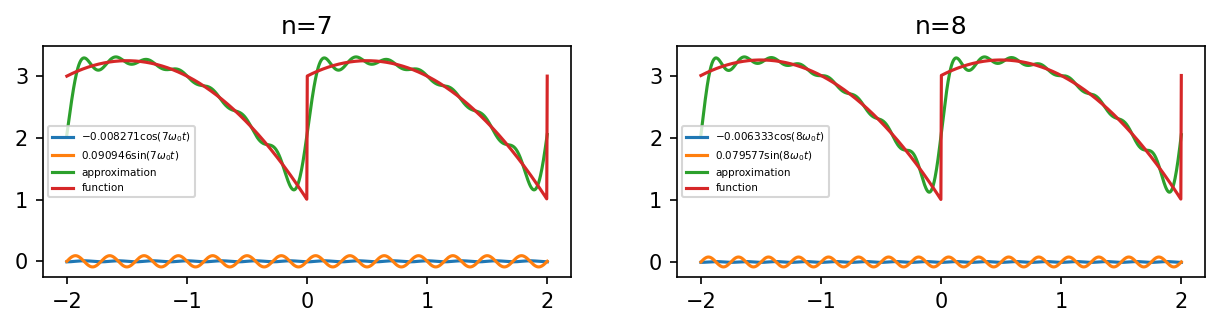

<Figure size 640x480 with 0 Axes>

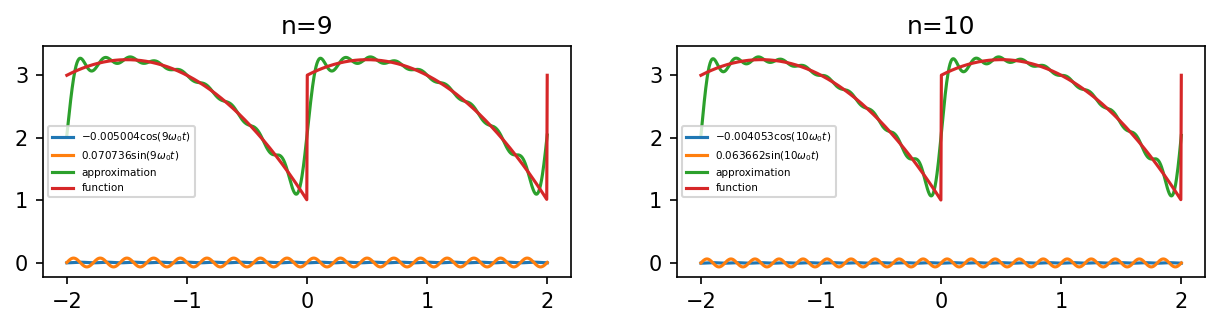

<Figure size 640x480 with 0 Axes>

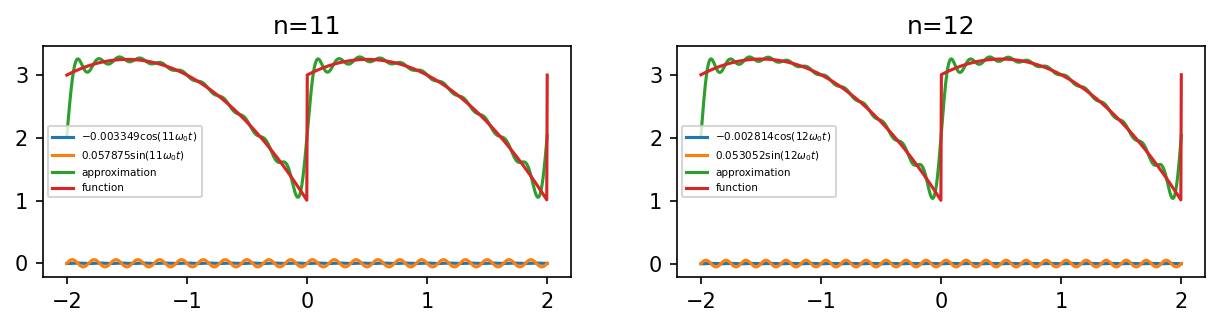

<Figure size 640x480 with 0 Axes>

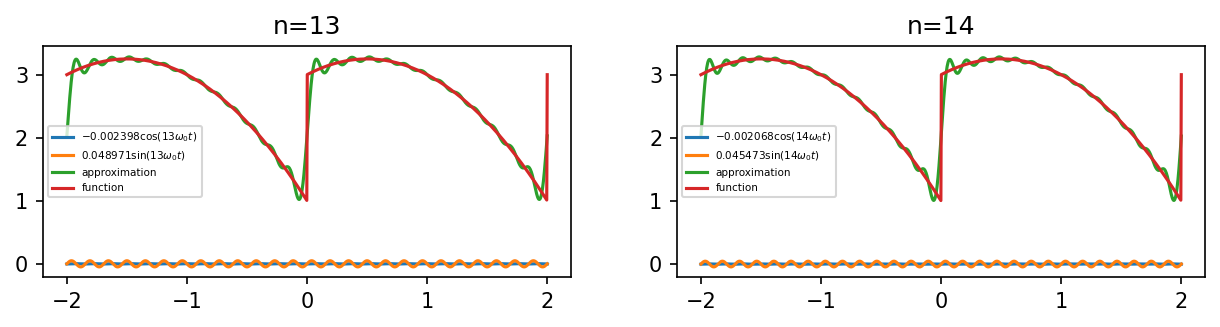

<Figure size 640x480 with 0 Axes>

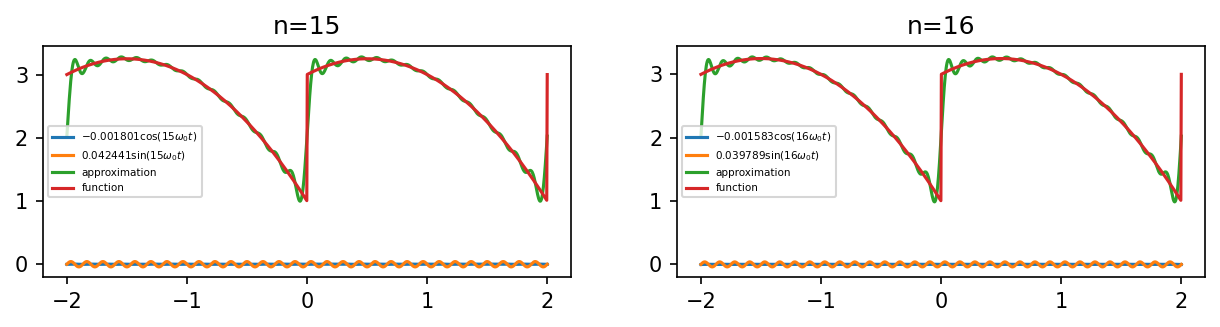

<Figure size 640x480 with 0 Axes>

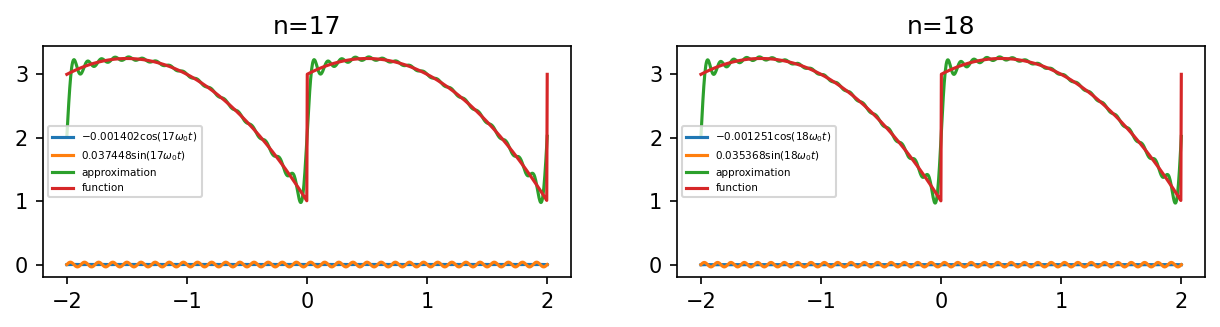

<Figure size 640x480 with 0 Axes>

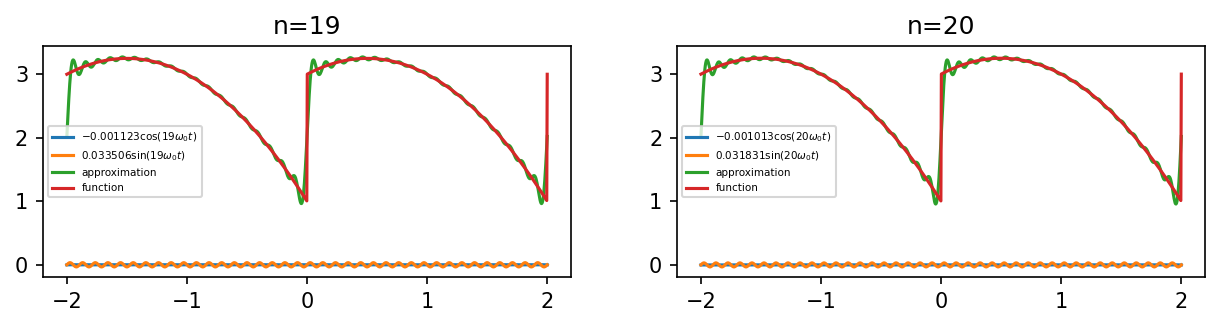

<Figure size 640x480 with 0 Axes>

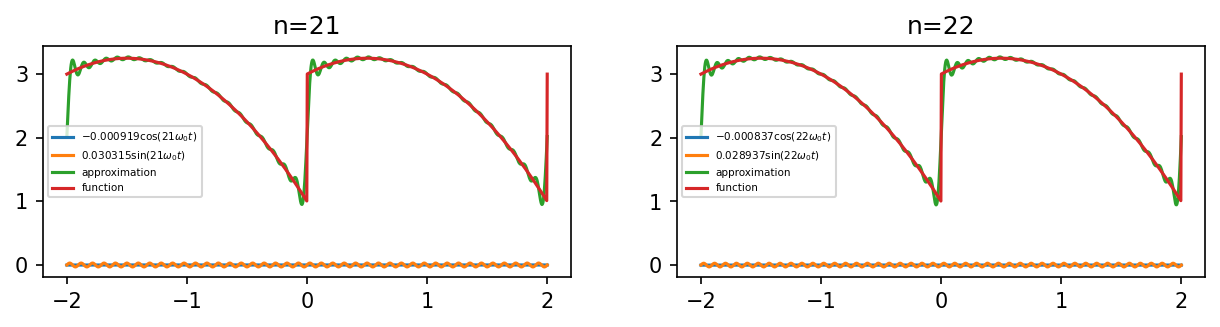

In [281]:
#grade (DO NOT DELETE THIS LINE) 

# use a for loop from 3 to num_coeff+1
# the np.arange(start, stop) creates an array of integers from 'start' up to (but not including) 'stop'.
# more info about np.arrange can be found here: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
for k in np.arange(3,num_coeff+1):  #do terms n=3,..,num_coeff of series

    # integrate (2/T)*f(x)*cos(nw0x) from -T/2 to T/2. 
    integrand = lambda x: (2/T)*f(x,T)*trig1(k,T,x)   #create temporay function 'integrand' so we can multiply functions to integrate
    a_n[k], err = quad(integrand, 0, T)   #obtain the a_n coefficient

    # integrate (2/T)*f(x)*sin(nw0x) from -T/2 to T/2. 
    integrand = lambda x: (2/T)*f(x,T)*trig2(k,T,x)   #create temporay function 'integrand' so we can multiply functions to integrate
    b_n[k], err = quad(integrand, 0, T)   #obtain the b_n coefficient

    f_approx += a_n[k]*trig1(k,T,t) + b_n[k]*trig2(k,T,t)   #add new terms to Fourier series
    n_min += 1

    err = np.mean((abs(f_approx-f(t,T))**2))

    if (k%2)==1:   #will plot two figures on the same row
        plt.figure()   #create new figure
        plt.figure(figsize=(10, 2), dpi= 150) # define the size of the figure (optional)
    plt.subplot(1,2,((k-1)%2)+1)   # create subplot with 1 row and 2 columns, and plot on the column given in the third argument
    plt.plot(t, a_n[k]*trig1(k,T,t), label='$%f\cos(%i\omega_0 t)$' %(a_n[k],k))
    plt.plot(t, b_n[k]*trig2(k,T,t), label='$%f\sin(%i\omega_0 t)$' %(b_n[k],k))
    plt.plot(t, f_approx, label='approximation')
    plt.plot(t, f(t,T), label='function')
    plt.legend(prop={'size': 5})
    plt.title('n=%i' %(k))
    if (k%2)==0:   #once we have the two plots for this subplot, show them
        plt.show()
    if (err < 0.01):
        break

Let's plot now the magnitude of the coefficients, $|a_n|$ and $|b_n|$, to see their contribution more clearly.

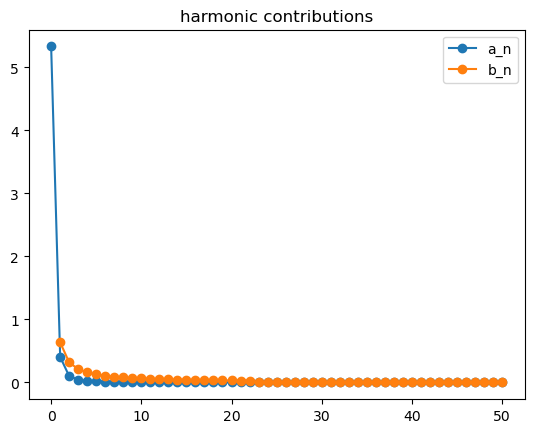

In [282]:
plt.figure()
plt.plot(np.arange(0,num_coeff+1), abs(a_n), label='a_n', marker='o')
plt.plot(np.arange(1,num_coeff+1), abs(b_n[1:]), label='b_n', marker='o')
plt.legend()
plt.title('harmonic contributions' %(k))
plt.show()

# Calculating the approximation error

There are many metrics to define the error between the orignal function $f(t)$ and the Fourier approximation $f_{approx}(t)$.  

Let's define the error as   
$$
\begin{align}
err = \frac{1}{T}\int_{-T/2}^{T/2} [f(t)-f_{approx}(t)]^2dt
\end{align}
$$
To implement this, you may use the following code, which calculates the mean squared error between the two functions. 


In [283]:
err = np.mean((abs(f_approx-f(t,T))**2))
print(f"err = {err}")

err = 0.009956582659200425


This number above shows the error when we use num_coeff (as defined earlier) pairs of cos and sin functions to approximate the original function.

## Question
Given the new function $g(t)$, defined below, obtain the minimum number of coefficients $n$, such that the error is less than 0.01.  

$f(t)\ =\ 3\ +\ t\ -\ t^2,\ t\in[0,T),$
with period $T=2.$

In order to do this, you will need to change several things in this notebook and run it again. It might be helpful to use 'break' to break a 'for' loop.

Keep in mind that if you 'save' the file, it will only 'save' it while you are using the workspace within PrairieLearn.  We suggest that you instead 'download' it if you want to save some changes and re-use them later by copying them.

In [284]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
# DO NOT change anything in this cell

answer1 = T
answer2 = f(t,T)
answer3 = f_approx
answer4 = n_min

print('finished.')

finished.
